<a href="https://colab.research.google.com/github/Anurag-1A/DA-DS/blob/main/Web_Scraping_%26_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [ ]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [ ]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np

## **Scrapping Movies Data**

In [ ]:
def fetch_movie_urls(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return "Failed to retrieve the page, status code:", response.status_code
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup


url = 'https://www.justwatch.com/in/movies?release_year_from=2000'
soup=fetch_movie_urls(url)
print(soup.prettify())


<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Movie URL's**

In [ ]:
# Write Your Code here
## Hint : Use the following code to extract the film urls
movie_links = soup.find_all('a', href=True)
movie_urls = [link['href'] for link in movie_links if '/movie/' in link['href']]
url_list=[]
for x in movie_urls:
   url_list.append('https://www.justwatch.com'+x)
url_list

['https://www.justwatch.com/in/movie/kill-2024',
 'https://www.justwatch.com/in/movie/project-k',
 'https://www.justwatch.com/in/movie/munjha',
 'https://www.justwatch.com/in/movie/maharaja-2024',
 'https://www.justwatch.com/in/movie/deadpool-3',
 'https://www.justwatch.com/in/movie/stree-2',
 'https://www.justwatch.com/in/movie/stree',
 'https://www.justwatch.com/in/movie/chandu-champion',
 'https://www.justwatch.com/in/movie/kingdom-of-the-planet-of-the-apes',
 'https://www.justwatch.com/in/movie/aadujeevitham',
 'https://www.justwatch.com/in/movie/deadpool',
 'https://www.justwatch.com/in/movie/agent',
 'https://www.justwatch.com/in/movie/dune-part-two',
 'https://www.justwatch.com/in/movie/the-ministry-of-ungentlemanly-warfare',
 'https://www.justwatch.com/in/movie/indian-2',
 'https://www.justwatch.com/in/movie/aavesham-2024',
 'https://www.justwatch.com/in/movie/the-gangster-the-cop-the-devil',
 'https://www.justwatch.com/in/movie/phir-aayi-hasseen-dillruba',
 'https://www.justwa

## **Scrapping Movie Title**

In [ ]:
# Write Your Code here
movie_title_list = []
for x in movie_urls:
  #cleaned_title = x.split('/')[3].capitalize()
  movie_title_list.append(x.split('/')[-1].capitalize())

movie_title_list


['Kill-2024',
 'Project-k',
 'Munjha',
 'Maharaja-2024',
 'Deadpool-3',
 'Stree-2',
 'Stree',
 'Chandu-champion',
 'Kingdom-of-the-planet-of-the-apes',
 'Aadujeevitham',
 'Deadpool',
 'Agent',
 'Dune-part-two',
 'The-ministry-of-ungentlemanly-warfare',
 'Indian-2',
 'Aavesham-2024',
 'The-gangster-the-cop-the-devil',
 'Phir-aayi-hasseen-dillruba',
 'Laila-majnu',
 'The-fall-guy',
 'Bhaiyaaji',
 '365-days',
 'Bad-boys-4',
 'Ullozhukku',
 'Weapon-2024',
 'Furiosa',
 'Je-jatt-vigad-gya',
 'Harom-hara',
 'A-quiet-place-day-one',
 'Raayan',
 'Golam',
 'Mr-and-mrs-mahi',
 'Deadpool-2',
 'Salaar',
 'Love-lies-bleeding-2024',
 'Savi-a-bloody-housewife',
 'Maharshi',
 'Dune-2021',
 'Aattam',
 'Laapataa-ladies',
 'Maharaj',
 'Twisters',
 'Family-star',
 'Perfect-days',
 'Manjummel-boys',
 'Inside-out-2',
 'Oppenheimer',
 'Despicable-me-4-2024',
 'Kung-fu-panda-4',
 'Bhediya',
 'Siddharth-roy',
 'It-ends-with-us',
 'Sam-bahadur',
 'Chandni-chowk-to-china',
 'Godzilla-x-kong-the-new-empire',
 'Dan

## **Scrapping release Year**

In [ ]:
# Write Your Code here
movie_release_years=[]

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Fetch the HTML content of the movie URL using requests
for movie_url in url_list:
    response = requests.get(movie_url, headers=headers)
    if response.status_code == 200:
        html_content=response.text
        # Parse the HTML content with BeautifulSoup
        soup=BeautifulSoup(html_content, 'html.parser')
        try:
            # Find the html tag which contains the release year
            release_year_element=soup.find('span', class_='release-year')
            release_year=release_year_element.get_text(strip=True).strip("()")
        except AttributeError:
            release_year='N/A'
        movie_release_years.append(release_year)
    else:
        print(f"Failed to fetch the HTML content for the movie {movie_url}")
        movie_release_years.append('N/A')

# Check final list data
print(movie_release_years)


Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/love-lies-bleeding-2024
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/maharshi
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/dune-2021
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/aattam
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/laapataa-ladies
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/maharaj
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/twisters
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/family-star
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/perfect-days
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/manjummel-boys
Failed to fetch the HTML content for the movie https://ww

## **Scrapping Genres**

In [ ]:
# Write Your Code here
movie_genres=[]

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Fetch the HTML content of the movie URL using requests
for movie_url in url_list:
    response = requests.get(movie_url, headers=headers)
    if response.status_code == 200:
        html_content=response.text
        # Parse the HTML content with BeautifulSoup
        soup=BeautifulSoup(html_content, 'html.parser')
        try:
          genres_heading=soup.find('h3', class_='detail-infos__subheading', string='Genres')
          if genres_heading:
              genres_element=genres_heading.find_next_sibling('div', class_='detail-infos__value')
              if genres_element:
                    genres=genres_element.text.strip()
              else:
                    genres='N/A'
          else:
                genres='N/A'
        except AttributeError:
            genres='Error in finding genres information'
        movie_genres.append(genres)

    else:
        print(f"Failed to fetch the HTML content for the movie {movie_url}")
        movie_genres.append('N/A')

# Check final list data
movie_genres



Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/manjummel-boys
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/inside-out-2
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/oppenheimer
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/despicable-me-4-2024
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/kung-fu-panda-4
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/bhediya
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/siddharth-roy
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/it-ends-with-us
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/sam-bahadur
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/chandni-chowk-to-china
Failed to fetch the HTML conte

['Drama, Mystery & Thriller, Action & Adventure, Crime',
 'Science-Fiction, Action & Adventure, Drama, Fantasy, Mystery & Thriller',
 'Horror, Comedy',
 'Crime, Drama, Mystery & Thriller, Action & Adventure',
 'Science-Fiction, Action & Adventure, Comedy',
 'Horror, Comedy',
 'Horror, Comedy, Drama',
 'History, Sport, War & Military, Action & Adventure, Drama',
 'Science-Fiction, Action & Adventure, Mystery & Thriller, Drama',
 'Drama',
 'Action & Adventure, Comedy',
 'Mystery & Thriller, Action & Adventure',
 'Action & Adventure, Science-Fiction, Drama',
 'Action & Adventure, Comedy, War & Military',
 'Drama, Mystery & Thriller, Action & Adventure',
 'Comedy, Action & Adventure',
 'Mystery & Thriller, Action & Adventure, Crime',
 'Romance, Mystery & Thriller, Crime, Drama',
 'Drama, Romance',
 'Comedy, Drama, Romance, Action & Adventure',
 'Action & Adventure, Drama',
 'Drama, Romance, Made in Europe',
 'Action & Adventure, Crime, Mystery & Thriller, Comedy',
 'Drama',
 'Science-Ficti

## **Scrapping IMBD Rating**

In [ ]:
imbd_ratings=[]

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Fetch the HTML content of the movie URL using requests
for movie_url in url_list:
    response = requests.get(movie_url, headers=headers)
    if response.status_code == 200:
        html_content=response.text
        # Parse the HTML content with BeautifulSoup
        soup=BeautifulSoup(html_content, 'html.parser')
        try:
          imdb_heading=soup.find('span', class_='imdb-score')
          if imdb_heading:
              rating=imdb_heading.text.split('(')[0]

          else:
                rating='N/A'
        except AttributeError:
            rating='Error in finding genres information'
        imbd_ratings.append(rating)
    else:
        print(f"Failed to fetch the HTML content for the movie {movie_url}")
        imbd_ratings.append('N/A')

# Check final list data
imbd_ratings


Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/kung-fu-panda-4
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/bhediya
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/siddharth-roy
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/it-ends-with-us
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/sam-bahadur
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/chandni-chowk-to-china
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/godzilla-x-kong-the-new-empire
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/dangal
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/the-hunger-games-the-ballad-of-songbirds-and-snakes
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/1

['7.6 ',
 '7.5 ',
 '7.1 ',
 '8.6 ',
 '8.0 ',
 '7.9 ',
 '7.5 ',
 '8.0 ',
 '6.9 ',
 '7.9 ',
 '8.0 ',
 '4.2 ',
 '8.5 ',
 '6.8 ',
 '4.1 ',
 '7.9 ',
 '6.9 ',
 '5.8 ',
 '7.7 ',
 '6.9 ',
 '5.1 ',
 '3.3 ',
 '6.7 ',
 '7.6 ',
 '6.9 ',
 '7.6 ',
 '4.8 ',
 '8.0 ',
 '6.4 ',
 '6.9 ',
 '7.3 ',
 '6.0 ',
 '7.6 ',
 '6.5 ',
 '6.7 ',
 '6.6 ',
 '7.2 ',
 '8.0 ',
 '8.2 ',
 '8.4 ',
 '6.5 ',
 '6.7 ',
 '5.3 ',
 '7.9 ',
 '8.3 ',
 '7.8 ',
 '8.3 ',
 '6.2 ',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 '6.2 ',
 'N/A',
 'N/A',
 '5.5 ',
 'N/A',
 'N/A',
 '7.8 ',
 'N/A',
 'N/A',
 '7.6 ',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 '5.4 ',
 '7.3 ',
 '8.2 ',
 '8.3 ',
 'N/A',
 'N/A',
 'N/A',
 '8.2 ',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 '7.6 ',
 '7.5 ',
 '7.1 ',
 '8.6 ',
 '8.0 ',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A']

## **Scrapping Runtime/Duration**

In [ ]:
movie_runtimes=[]

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Fetch the HTML content of the movie URL using requests
for movie_url in url_list:
    response = requests.get(movie_url, headers=headers)
    if response.status_code == 200:
        html_content=response.text
        # Parse the HTML content with BeautifulSoup
        soup=BeautifulSoup(html_content, 'html.parser')
        try:
          movie_rt=soup.find('h3', class_='detail-infos__subheading', string='Runtime')
          if movie_rt:
              runtime_element=movie_rt.find_next_sibling('div', class_='detail-infos__value')
              if runtime_element:
                    movie_runtime = runtime_element.text.strip()
              else:
                    movie_runtime = 'N/A'
          else:
                movie_runtime = 'N/A'
        except AttributeError:
            movie_runtime ='Error in finding genres information'
        movie_runtimes.append(movie_runtime)
    else:
        print(f"Failed to fetch the HTML content for the movie {movie_url}")
        movie_runtimes.append('N/A')

# Check final list data
movie_runtimes


Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/dangal
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/the-hunger-games-the-ballad-of-songbirds-and-snakes
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/12th-fail
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/inside-out
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/haseen-dillruba
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/aranmanai-4
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/longlegs
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/hit-man
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/rockstar
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/untitled-vicky-kaushal-prime-video-project
Fai

['1h 45min',
 '3h 1min',
 '2h 3min',
 '2h 30min',
 '2h 8min',
 '2h 27min',
 '2h 8min',
 '2h 22min',
 '2h 25min',
 '2h 0min',
 '1h 48min',
 '2h 34min',
 '2h 47min',
 '2h 2min',
 '3h 0min',
 '2h 38min',
 '1h 50min',
 '2h 13min',
 '2h 19min',
 '2h 6min',
 '2h 30min',
 '1h 54min',
 '1h 55min',
 '2h 3min',
 '2h 0min',
 '2h 28min',
 '2h 12min',
 '2h 34min',
 '1h 39min',
 '2h 25min',
 '2h 0min',
 '2h 19min',
 '2h 0min',
 '2h 55min',
 '1h 44min',
 '2h 3min',
 '2h 56min',
 '2h 35min',
 '2h 19min',
 '2h 2min',
 '2h 12min',
 '2h 3min',
 '2h 39min',
 '2h 4min',
 '2h 15min',
 '1h 37min',
 '3h 0min',
 '1h 35min',
 '1h 34min',
 '2h 36min',
 '2h 28min',
 '2h 10min',
 '2h 30min',
 '2h 34min',
 '1h 55min',
 'N/A',
 'N/A',
 'N/A',
 '3h 24min',
 '1h 55min',
 'N/A',
 '1h 49min',
 'N/A',
 '2h 30min',
 '2h 36min',
 'N/A',
 'N/A',
 '2h 32min',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 '2h 49min',
 'N/A',
 '1

## **Scrapping Age Rating**

In [ ]:
movie_age_ratings=[]

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Fetch the HTML content of the movie URL using requests
for movie_url in url_list:
    response = requests.get(movie_url, headers=headers)
    if response.status_code == 200:
        html_content=response.text
        # Parse the HTML content with BeautifulSoup
        soup=BeautifulSoup(html_content, 'html.parser')
        try:
          age_rating=soup.find('h3', class_='detail-infos__subheading', string='Age rating')
          if age_rating:
              age_rating_element=age_rating.find_next_sibling('div', class_='detail-infos__value')
              if age_rating_element:
                    ag_rating = age_rating_element.text.strip()
              else:
                    ag_rating = 'N/A'
          else:
                ag_rating = 'N/A'
        except AttributeError:
            ag_rating ='Error in finding genres information'
        movie_age_ratings.append(ag_rating)
    else:
        print(f"Failed to fetch the HTML content for the movie {movie_url}")
        movie_age_ratings.append('N/A')

# Check final list data
movie_age_ratings


Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/untitled-vicky-kaushal-prime-video-project
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/hanu-man
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/garudan-2024
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/sultan
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/civil-war-2024-0
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/little-hearts
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/sri-2023
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/satyabhama
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/logan
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/the-intern
Failed to fetch the HTML content for the

['A',
 'UA',
 'N/A',
 'N/A',
 'A',
 'UA',
 'UA',
 'UA',
 'N/A',
 'UA',
 'A',
 'UA',
 'N/A',
 'N/A',
 'UA',
 'N/A',
 'N/A',
 'N/A',
 'UA',
 'UA',
 'N/A',
 'N/A',
 'N/A',
 'U',
 'UA',
 'A',
 'N/A',
 'A',
 'N/A',
 'A',
 'UA',
 'U',
 'A',
 'A',
 'N/A',
 'UA',
 'UA',
 'UA',
 'UA',
 'UA',
 'N/A',
 'UA',
 'N/A',
 'N/A',
 'UA',
 'U',
 'UA',
 'N/A',
 'U',
 'UA',
 'A',
 'A',
 'UA',
 'U',
 'UA',
 'U',
 'N/A',
 'N/A',
 'A',
 'N/A',
 'U',
 'N/A',
 'N/A',
 'UA',
 'U',
 'N/A',
 'A',
 'U',
 'A',
 'UA',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'U',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'UA',
 'N/A',
 'N/A',
 'A',
 'A',
 'UA',
 'N/A',
 'N/A',
 'N/A',
 'U',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'A',
 'UA',
 'N/A',
 'N/A',
 'A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A']

## **Fetching Production Countries Details**

In [ ]:
production_countries=[]

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Fetch the HTML content of the movie URL using requests
for movie_url in url_list:
    response = requests.get(movie_url, headers=headers)
    if response.status_code == 200:
        html_content=response.text
        # Parse the HTML content with BeautifulSoup
        soup=BeautifulSoup(html_content, 'html.parser')
        try:
          prod_countries=soup.find('h3', class_='detail-infos__subheading', string=' Production country ')
          if prod_countries:
              prod_countries_element=prod_countries.find_next_sibling('div', class_='detail-infos__value')
              if prod_countries_element:
                    country = prod_countries_element.text.strip()
              else:
                    country = 'N/A'
          else:
                country = 'N/A'
        except AttributeError:
            country ='Error in finding genres information'
        production_countries.append(country)
    else:
        print(f"Failed to fetch the HTML content for the movie {movie_url}")
        production_countries.append('N/A')

# Check final list data
production_countries


Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/the-intern
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/tumbbad
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/eternal-sunshine-of-the-spotless-mind
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/exhuma
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/k-g-f-chapter-1
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/the-unbearable-weight-of-massive-talent
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/kingsman-the-secret-service
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/music-shop-murthy
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/bramayugam
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/movie/mem

['India',
 'India',
 'India',
 'India',
 'United States',
 'India',
 'India',
 'India',
 'United States',
 'India, United States',
 'United States',
 'India',
 'United States',
 'United Kingdom, Turkey, United States',
 'India',
 'India',
 'South Korea',
 'India',
 'India',
 'Australia, Canada, United States',
 'India',
 'Poland',
 'United States',
 'India',
 'India',
 'Australia, United States',
 'India',
 'India',
 'Canada, United States, United Kingdom',
 'India',
 'India',
 'India',
 'United States',
 'India',
 'United Kingdom, United States',
 'India',
 'India',
 'United States',
 'India',
 'India',
 'India',
 'United States',
 'India',
 'Japan, Germany',
 'India',
 'United States',
 'United Kingdom, United States',
 'United States',
 'United States',
 'India',
 'India',
 'United States',
 'India',
 'Thailand, China, India',
 'United States',
 'India, United States',
 'United States, Canada',
 'India',
 'India',
 'United States',
 'United States',
 'United States',
 'India',
 'Ind

## **Fetching Streaming Service Details**

In [ ]:

movie_service_provider=[]

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Fetch the HTML content of the movie URL using requests
for movie_url in url_list:
    response = requests.get(movie_url, headers=headers)
    if response.status_code == 200:
        html_content=response.text
        # Parse the HTML content with BeautifulSoup
        soup=BeautifulSoup(html_content, 'html.parser')
        # Find the provider element
        ss_provider_element=soup.find('img', class_='offer__icon')
        if ss_provider_element:
          ss_provider_name=ss_provider_element.get('alt')

          if ss_provider_name:
            service = ss_provider_name

          else:
            service = 'N/A'
        else:
            service = 'N/A'

        #append in list provider:
        movie_service_provider.append(service)
    else:
        print(f"Failed to fetch the webpage for {movie_url}")
        movie_service_provider.append('N/A')

# Check final list data
movie_service_provider


Failed to fetch the webpage for https://www.justwatch.com/in/movie/k-g-f-chapter-1
Failed to fetch the webpage for https://www.justwatch.com/in/movie/the-unbearable-weight-of-massive-talent
Failed to fetch the webpage for https://www.justwatch.com/in/movie/kingsman-the-secret-service
Failed to fetch the webpage for https://www.justwatch.com/in/movie/bramayugam
Failed to fetch the webpage for https://www.justwatch.com/in/movie/memories-of-murder
Failed to fetch the webpage for https://www.justwatch.com/in/movie/monkey-man
Failed to fetch the webpage for https://www.justwatch.com/in/movie/trisha-on-the-rocks
Failed to fetch the webpage for https://www.justwatch.com/in/movie/super-deluxe
Failed to fetch the webpage for https://www.justwatch.com/in/movie/adam-sandler-love-you
Failed to fetch the webpage for https://www.justwatch.com/in/movie/apollo-13-survival
Failed to fetch the webpage for https://www.justwatch.com/in/movie/rebel-ridge
Failed to fetch the webpage for https://www.justwatc

['N/A',
 'Amazon Prime Video',
 'N/A',
 'Netflix',
 'Bookmyshow',
 'Bookmyshow',
 'Apple TV',
 'Amazon Prime Video',
 'Apple TV',
 'Netflix',
 'Apple TV',
 'N/A',
 'Apple TV',
 'Amazon Prime Video',
 'Netflix',
 'Amazon Prime Video',
 'N/A',
 'Netflix',
 'Zee5',
 'Apple TV',
 'Zee5',
 'Netflix',
 'Apple TV',
 'Amazon Prime Video',
 'Amazon Prime Video',
 'Apple TV',
 'N/A',
 'Amazon Prime Video',
 'Apple TV',
 'Amazon Prime Video',
 'Amazon Prime Video',
 'Netflix',
 'Apple TV',
 'Hotstar',
 'Amazon Prime Video',
 'Netflix',
 'Amazon Prime Video',
 'Apple TV',
 'Amazon Prime Video',
 'Netflix',
 'Netflix',
 'Bookmyshow',
 'Amazon Prime Video',
 'MUBI',
 'Hotstar',
 'Apple TV',
 'Apple TV',
 'Apple TV',
 'Apple TV',
 'Jio Cinema',
 'aha',
 'Bookmyshow',
 'Zee5',
 'N/A',
 'Apple TV',
 'Apple TV',
 'Amazon Prime Video',
 'Hotstar',
 'Netflix',
 'Apple TV',
 'Apple TV',
 'Netflix',
 'Netflix',
 'N/A',
 'Hotstar',
 'Hotstar',
 'Bookmyshow',
 'Apple TV',
 'Netflix',
 'Apple TV',
 'N/A',
 'Ji

## **Now Creating Movies DataFrame**

In [ ]:
movies_data = {
    'Movie Title':movie_title_list,
    'IMDB Rating':imbd_ratings,
    'Release Year':movie_release_years,
    'Genre':movie_genres,
    'Runtime/Duration':movie_runtimes,
    'Age Rating':movie_age_ratings,
    'Production Country':production_countries,
    'Streaming Platform':movie_service_provider,
    'Url':url_list
}

df_movies = pd.DataFrame(movies_data)

# Quick view of the resultant dataframe
df_movies.head()

,Movie Title,IMDB Rating,Release Year,Genre,Runtime/Duration,Age Rating,Production Country,Streaming Platform,Url
0,Kill-2024,7.6,2024,"Drama, Mystery & Thriller, Action & Adventure,...",1h 45min,A,India,N/A,https://www.justwatch.com/in/movie/kill-2024
1,Project-k,7.5,2024,"Science-Fiction, Action & Adventure, Drama, Fa...",3h 1min,UA,India,Amazon Prime Video,https://www.justwatch.com/in/movie/project-k
2,Munjha,7.1,2024,"Horror, Comedy",2h 3min,N/A,India,N/A,https://www.justwatch.com/in/movie/munjha
3,Maharaja-2024,8.6,2024,"Crime, Drama, Mystery & Thriller, Action & Adv...",2h 30min,N/A,India,Netflix,https://www.justwatch.com/in/movie/maharaja-2024
4,Deadpool-3,8.0,2024,"Science-Fiction, Action & Adventure, Comedy",2h 8min,A,United States,Bookmyshow,https://www.justwatch.com/in/movie/deadpool-3


## **Scraping TV  Show Data**

In [ ]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'


tv_soup=fetch_movie_urls(tv_url)
print(soup.prettify())


<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="yes" data-vue-meta="ssr" name="mobile-web-app-capable"/>
  <meta content="yes" data-vue-meta="ssr" name="apple-mobile-web-app-capable"/>
  <meta content="#182531" data-vue-meta="ssr" name="theme-color"/>
  <meta content="4eBTNBm4L6RaWdF8V51EHZajskAMgXYAg81iRXJqumQ" data-vue-meta

## **Fetching Tv shows Url details**

In [ ]:
# Write Your Code here
tv_show_links = tv_soup.find_all('a', href=True)
tv_show_urls = [link['href'] for link in tv_show_links if '/tv-show/' in link['href']]
tvs_url_list=[]
for x in tv_show_urls:
   tvs_url_list.append('https://www.justwatch.com'+x)
tvs_url_list

['https://www.justwatch.com/in/tv-show/mirzapur',
 'https://www.justwatch.com/in/tv-show/house-of-the-dragon',
 'https://www.justwatch.com/in/tv-show/adams-sweet-agony',
 'https://www.justwatch.com/in/tv-show/the-boys',
 'https://www.justwatch.com/in/tv-show/gyaarah-gyaarah',
 'https://www.justwatch.com/in/tv-show/game-of-thrones',
 'https://www.justwatch.com/in/tv-show/sweet-home',
 'https://www.justwatch.com/in/tv-show/panchayat',
 'https://www.justwatch.com/in/tv-show/apharan',
 'https://www.justwatch.com/in/tv-show/x-x-x-uncensored',
 'https://www.justwatch.com/in/tv-show/shekhar-home',
 'https://www.justwatch.com/in/tv-show/attack-on-titan',
 'https://www.justwatch.com/in/tv-show/shogun-2024',
 'https://www.justwatch.com/in/tv-show/batman-caped-crusader',
 'https://www.justwatch.com/in/tv-show/elite',
 'https://www.justwatch.com/in/tv-show/demon-slayer-kimetsu-no-yaiba',
 'https://www.justwatch.com/in/tv-show/tribhuvan-mishra-ca-topper',
 'https://www.justwatch.com/in/tv-show/the-

## **Fetching Tv Show Title details**

In [ ]:
tvs_title_list = []
for x in tv_show_urls:
  parts = x.split('/')[3:] # Split the string at '/' and take the parts after 'tv-show'

  # Join with a space between them incase there are two parts e.g. terminator-zero/season-1.
  tvs_title_list.append(' '.join(parts))
tvs_title_list

['mirzapur',
 'house-of-the-dragon',
 'adams-sweet-agony',
 'the-boys',
 'gyaarah-gyaarah',
 'game-of-thrones',
 'sweet-home',
 'panchayat',
 'apharan',
 'x-x-x-uncensored',
 'shekhar-home',
 'attack-on-titan',
 'shogun-2024',
 'batman-caped-crusader',
 'elite',
 'demon-slayer-kimetsu-no-yaiba',
 'tribhuvan-mishra-ca-topper',
 'the-umbrella-academy',
 'shahmaran',
 'mad-men',
 'presumed-innocent',
 'mastram',
 'paperhouse',
 'the-bear',
 'bigg-boss-ott',
 'bigg-boss',
 'farzi',
 'asur',
 'gullak',
 'a-good-girls-guide-to-murder',
 'aashram',
 'unsolved-mysteries-2020',
 'the-family-man',
 'breaking-bad',
 'stranger-things',
 'the-rookie',
 'evil',
 'college-romance',
 'y-the-last-man',
 'dark',
 'scam-1992',
 'terror-tuesday-extreme',
 'tulsa-king',
 'gandii-baat',
 'kota-factory',
 'emily-in-paris',
 'fallout',
 'tujhpe-main-fida',
 'raising-voices',
 'dark-winds',
 'peaky-blinders',
 'sherlock',
 'you',
 '3-body-problem',
 'jujutsu-kaisen',
 'mtv-splitsvilla',
 'cobra-kai',
 'the-wal

## **Fetching Release Year**

In [ ]:
# Write Your Code here
tvs_release_years=[]

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Fetch the HTML content of the movie URL using requests
for url in tvs_url_list:
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        html_content=response.text
        # Parse the HTML content with BeautifulSoup
        soup=BeautifulSoup(html_content, 'html.parser')
        try:
            # Find the html tag which contains the release year
            release_year_element=soup.find('span', class_='release-year')
            release_year=release_year_element.get_text(strip=True).strip("()")
        except AttributeError:
            release_year='N/A'
        tvs_release_years.append(release_year)
    else:
        print(f"Failed to fetch the HTML content for the movie {url}")
        tvs_release_years.append('N/A')

# Check final list data
print(tvs_release_years)


Failed to fetch the HTML content for the movie https://www.justwatch.com/in/tv-show/tribhuvan-mishra-ca-topper
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/tv-show/the-umbrella-academy
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/tv-show/shahmaran
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/tv-show/mad-men
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/tv-show/presumed-innocent
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/tv-show/mastram
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/tv-show/paperhouse
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/tv-show/the-bear
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/tv-show/bigg-boss-ott
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/tv-show/bigg-boss
Failed to fetch the HTML

## **Fetching TV Show Genre Details**

In [ ]:
tvs_genres=[]

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Fetch the HTML content of the movie URL using requests
for url in tvs_url_list:
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        html_content=response.text
        # Parse the HTML content with BeautifulSoup
        soup=BeautifulSoup(html_content, 'html.parser')
        try:
          genres_heading=soup.find('h3', class_='detail-infos__subheading', string='Genres')
          if genres_heading:
              genres_element=genres_heading.find_next_sibling('div', class_='detail-infos__value')
              if genres_element:
                    genres=genres_element.text.strip()
              else:
                    genres='N/A'
          else:
                genres='N/A'
        except AttributeError:
            genres='Error in finding genres information'
        tvs_genres.append(genres)

    else:
        print(f"Failed to fetch the HTML content for the movie {url}")
        tvs_genres.append('N/A')

# Check final list data
print(tvs_genres)


Failed to fetch the HTML content for the movie https://www.justwatch.com/in/tv-show/presumed-innocent
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/tv-show/mastram
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/tv-show/paperhouse
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/tv-show/the-bear
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/tv-show/bigg-boss-ott
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/tv-show/bigg-boss
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/tv-show/farzi
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/tv-show/asur
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/tv-show/gullak
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/tv-show/a-good-girls-guide-to-murder
Failed to fetch the HTML content for the mo

## **Fetching IMDB Rating Details**

In [ ]:
# Write Your Code here
tvs_imbd_ratings=[]

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Fetch the HTML content of the movie URL using requests
for url in tvs_url_list:
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        html_content=response.text
        # Parse the HTML content with BeautifulSoup
        soup=BeautifulSoup(html_content, 'html.parser')
        try:
          imdb_heading=soup.find('span', class_='imdb-score')
          if imdb_heading:
              rating=imdb_heading.text.split('(')[0]

          else:
                rating='N/A'
        except AttributeError:
            rating='N/A'
        tvs_imbd_ratings.append(rating)
    else:
        print(f"Failed to fetch the HTML content for the movie {url}")
        tvs_imbd_ratings.append('N/A')

# Check final list data
tvs_imbd_ratings

Failed to fetch the HTML content for the movie https://www.justwatch.com/in/tv-show/breaking-bad
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/tv-show/stranger-things
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/tv-show/the-rookie
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/tv-show/college-romance
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/tv-show/y-the-last-man
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/tv-show/dark
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/tv-show/scam-1992
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/tv-show/terror-tuesday-extreme
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/tv-show/tulsa-king
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/tv-show/kota-factory
Failed to fetch the HTML co

['8.4 ',
 '8.4 ',
 'N/A',
 '8.7 ',
 '8.3 ',
 '9.2 ',
 '7.3 ',
 '9.0 ',
 '8.2 ',
 '4.8 ',
 '8.3 ',
 '9.1 ',
 '8.7 ',
 '7.3 ',
 '7.2 ',
 '8.6 ',
 '7.0 ',
 '7.9 ',
 '5.3 ',
 '8.7 ',
 '7.7 ',
 '6.9 ',
 '8.2 ',
 '8.6 ',
 '1.9 ',
 '3.6 ',
 '8.4 ',
 '8.5 ',
 '9.1 ',
 '6.8 ',
 '6.6 ',
 '7.3 ',
 '8.7 ',
 'N/A',
 'N/A',
 'N/A',
 '7.8 ',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 '3.4 ',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 '7.7 ',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 '6.5 ',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 '8.4 ',
 '8.4 ',
 'N/A',
 '8.7 ',
 '8.3 ',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A']

## **Fetching Age Rating Details**

In [ ]:
tvs_age_ratings=[]

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Fetch the HTML content of the movie URL using requests
for url in tvs_url_list:
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        html_content=response.text
        # Parse the HTML content with BeautifulSoup
        soup=BeautifulSoup(html_content, 'html.parser')
        try:
          age_rating=soup.find('h3', class_='detail-infos__subheading', string='Age rating')
          if age_rating:
              age_rating_element=age_rating.find_next_sibling('div', class_='detail-infos__value')
              if age_rating_element:
                    ag_rating = age_rating_element.text.strip()
              else:
                    ag_rating = 'N/A'
          else:
                ag_rating = 'N/A'
        except AttributeError:
            ag_rating ='Error in finding genres information'
        tvs_age_ratings.append(ag_rating)
    else:
        print(f"Failed to fetch the HTML content for the movie {url}")
        tvs_age_ratings.append('N/A')

# Check final list data
tvs_age_ratings



Failed to fetch the HTML content for the movie https://www.justwatch.com/in/tv-show/damaged
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/tv-show/jamnapaar
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/tv-show/the-vampire-diaries
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/tv-show/ghosts
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/tv-show/the-gentlemen
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/tv-show/paatal-lok
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/tv-show/only-murders-in-the-building/season-4
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/tv-show/kaos/season-1
Failed to fetch the HTML content for the movie https://www.justwatch.com/in/tv-show/the-lord-of-the-rings-the-rings-of-power/season-2
Failed to fetch the HTML content for the movie https://www.justwatch.com

['A',
 'A',
 'N/A',
 'A',
 'A',
 'U',
 'A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'UA',
 'N/A',
 'N/A',
 'A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'U',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'A',
 'N/A',
 'N/A',
 'N/A',
 'A',
 'A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'A',
 'N/A',
 'N/A',
 'A',
 'N/A',
 'A',
 'N/A',
 'A',
 'U',
 'A',
 'A',
 'N/A',
 'U',
 'A',
 'U',
 'U',
 'N/A',
 'N/A',
 'U',
 'U',
 'N/A',
 'U',
 'A',
 'A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'U',
 'U',
 'N/A',
 'N/A',
 'U',
 'N/A',
 'A',
 'U',
 'N/A',
 'N/A',
 'N/A',
 'A',
 'A',
 'N/A',
 'N/A',
 'N/A',
 'A',
 'UA',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'A',
 'A',
 'N/A',
 'A',
 'A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A']

## **Fetching Production Country details**

In [ ]:
tvs_production_countries=[]

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Fetch the HTML content of the movie URL using requests
for url in tvs_url_list:
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        html_content=response.text
        # Parse the HTML content with BeautifulSoup
        soup=BeautifulSoup(html_content, 'html.parser')
        try:
          prod_countries=soup.find('h3', class_='detail-infos__subheading', string=' Production country ')
          if prod_countries:
              prod_countries_element=prod_countries.find_next_sibling('div', class_='detail-infos__value')
              if prod_countries_element:
                    country = prod_countries_element.text.strip()
              else:
                    country = 'N/A'
          else:
                country = 'N/A'
        except AttributeError:
            country ='Error in finding genres information'
        tvs_production_countries.append(country)
    else:
        print(f"Failed to fetch the HTML content for the movie {url}")
        tvs_production_countries.append('N/A')

# Check final list data
tvs_production_countries


['India',
 'United States',
 'Japan',
 'United States',
 'India',
 'United States',
 'South Korea',
 'India',
 'India',
 'India',
 'India',
 'Japan',
 'United States',
 'United States',
 'Spain',
 'Japan',
 'India',
 'United States',
 'Turkey',
 'United States',
 'United States',
 'India',
 'Spain',
 'United States',
 'India',
 'India',
 'India',
 'India',
 'India',
 'Germany, United Kingdom',
 'India',
 'United States',
 'India',
 'United States',
 'United States',
 'United States',
 'United States',
 'India',
 'United States',
 'Germany',
 'India',
 'Thailand',
 'United States',
 'India',
 'India',
 'United States',
 'United States',
 'India',
 'Spain',
 'United States',
 'United Kingdom',
 'United Kingdom',
 'United States',
 'United States',
 'United States, Japan',
 'India',
 'United States',
 'United States',
 'Japan',
 'Japan',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'South K

## **Fetching Streaming Service details**

In [ ]:
tvs_service_provider = []

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Fetch the HTML content of the movie URL using requests
for url in tvs_url_list:
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        html_content=response.text
        # Parse the HTML content with BeautifulSoup
        soup=BeautifulSoup(html_content, 'html.parser')
        # Find the provider element
        ss_provider_element=soup.find('img', class_='offer__icon')
        if ss_provider_element:
          ss_provider_name=ss_provider_element.get('alt')

          if ss_provider_name:
                service = ss_provider_name
          else:
                service = 'N/A'
        else:
              service = 'N/A'

        #append in list provider:
        tvs_service_provider.append(service)
    else:
        print(f"Failed to fetch the webpage for {url}")
        tvs_service_provider.append('N/A')

# Check final list data
tvs_service_provider




['Amazon Prime Video',
 'Jio Cinema',
 'Amazon Prime Video',
 'Amazon Prime Video',
 'Zee5',
 'Jio Cinema',
 'Netflix',
 'Amazon Prime Video',
 'Alt Balaji',
 'Alt Balaji',
 'Jio Cinema',
 'Amazon Prime Video',
 'Hotstar',
 'Amazon Prime Video',
 'Netflix',
 'Netflix',
 'Netflix',
 'Netflix',
 'Netflix',
 'Netflix',
 'Apple TV Plus',
 'N/A',
 'Netflix',
 'Hotstar',
 'Jio Cinema',
 'N/A',
 'Amazon Prime Video',
 'Jio Cinema',
 'Sony Liv',
 'Netflix',
 'MX Player',
 'Netflix',
 'Amazon Prime Video',
 'Netflix',
 'Netflix',
 'N/A',
 'Jio Cinema',
 'Sony Liv',
 'N/A',
 'Netflix',
 'Sony Liv',
 'Netflix',
 'Jio Cinema',
 'Alt Balaji',
 'Netflix',
 'Netflix',
 'Amazon Prime Video',
 'MX Player',
 'Netflix',
 'Amazon Prime Video',
 'Netflix',
 'Amazon Prime Video',
 'Netflix',
 'Netflix',
 'Amazon Prime Video',
 'Jio Cinema',
 'Netflix',
 'Amazon Prime Video',
 'Crunchyroll',
 'Amazon Prime Video',
 'Amazon Prime Video',
 'Amazon Prime Video',
 'Jio Cinema',
 'N/A',
 'Hotstar',
 'Apple TV Plu

## **Fetching Duration Details**

In [ ]:

tvs_runtimes=[]

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Fetch the HTML content of the movie URL using requests
for url in tvs_url_list:
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        html_content=response.text
        # Parse the HTML content with BeautifulSoup
        soup=BeautifulSoup(html_content, 'html.parser')
        try:
          tvs_rt=soup.find('h3', class_='detail-infos__subheading', string='Runtime')
          if tvs_rt:
              runtime_element=tvs_rt.find_next_sibling('div', class_='detail-infos__value')
              if runtime_element:
                    tvs_runtime = runtime_element.text.strip()
              else:
                    tvs_runtime = 'N/A'
          else:
                tvs_runtime = 'N/A'
        except AttributeError:
            tvs_runtime ='Error in finding genres information'
        tvs_runtimes.append(tvs_runtime)
    else:
        print(f"Failed to fetch the HTML content for the movie {url}")
        tvs_runtimes.append('N/A')

# Check final list data
tvs_runtimes


['50min',
 '1h 0min',
 '3min',
 '1h 1min',
 '43min',
 '58min',
 '58min',
 '35min',
 '24min',
 '22min',
 '42min',
 '25min',
 '59min',
 '25min',
 '49min',
 '26min',
 '57min',
 '51min',
 '49min',
 '49min',
 '43min',
 '28min',
 '50min',
 '34min',
 '1h 28min',
 '1h 16min',
 '56min',
 '47min',
 '30min',
 '44min',
 '43min',
 '45min',
 '45min',
 '47min',
 '1h 1min',
 '43min',
 '49min',
 '31min',
 '51min',
 '56min',
 '52min',
 '43min',
 '38min',
 '44min',
 '43min',
 '31min',
 '59min',
 '26min',
 '46min',
 '46min',
 '58min',
 '1h 28min',
 '48min',
 '56min',
 '24min',
 '45min',
 '35min',
 '46min',
 '24min',
 '23min',
 '45min',
 '43min',
 '1h 1min',
 '50min',
 '24min',
 '52min',
 '58min',
 '47min',
 '1h 1min',
 '21min',
 '56min',
 '1h 4min',
 '58min',
 '54min',
 '45min',
 '55min',
 '55min',
 '44min',
 '43min',
 '19min',
 '53min',
 '44min',
 '43min',
 '50min',
 '50min',
 '21min',
 '1h 3min',
 '1h 5min',
 '57min',
 '46min',
 '52min',
 '34min',
 '20min',
 '1h 1min',
 '39min',
 '32min',
 '42min',
 '30

## **Creating TV Show DataFrame**

In [ ]:
# Write Your Code here
tv_show_data = {
    'TV Show Title':tvs_title_list,
    'TV Show IMDB Rating':tvs_imbd_ratings,
    'TV Show Release Year':tvs_release_years,
    'TV Show Genre':tvs_genres,
    'TV Show Runtime/Duration':tvs_runtimes,
    'TV Show Age Rating':tvs_age_ratings,
    'TV Show Production Country':tvs_production_countries,
    'TV Show Streaming Platform':tvs_service_provider,
    'TV Show Url':tvs_url_list
}

df_tv_show = pd.DataFrame(tv_show_data)

# Quick view of the resultant dataframe
df_tv_show.head()

,TV Show Title,TV Show IMDB Rating,TV Show Release Year,TV Show Genre,TV Show Runtime/Duration,TV Show Age Rating,TV Show Production Country,TV Show Streaming Platform,TV Show Url
0,mirzapur,8.4,2018,"Action & Adventure, Drama, Crime, Mystery & Th...",50min,A,India,Amazon Prime Video,https://www.justwatch.com/in/tv-show/mirzapur
1,house-of-the-dragon,8.4,2022,"Action & Adventure, Science-Fiction, Drama, Fa...",1h 0min,A,United States,Jio Cinema,https://www.justwatch.com/in/tv-show/house-of-...
2,adams-sweet-agony,N/A,2024,Animation,3min,N/A,Japan,Amazon Prime Video,https://www.justwatch.com/in/tv-show/adams-swe...
3,the-boys,8.7,2019,"Science-Fiction, Action & Adventure, Crime, Dr...",1h 1min,A,United States,Amazon Prime Video,https://www.justwatch.com/in/tv-show/the-boys
4,gyaarah-gyaarah,8.3,2024,"Drama, Fantasy, Science-Fiction",43min,A,India,Zee5,https://www.justwatch.com/in/tv-show/gyaarah-g...


## **Task 2 :- Data Filtering & Analysis**

In [ ]:
# Filtering movies and TV shows to include only those released in the last two years and with an IMDB Rating of 7 or higher.

from datetime import datetime, timedelta

# Get the current date
current_date = datetime.now()

# Calculate the date 2 years ago from the current date
two_years_ago = current_date - pd.DateOffset(years=2)

def data_filter(df, release_year, imdb_rating, years_ago, current_date):

    # Converting the 'Release Year' column to datetime format
    df[release_year] = pd.to_datetime(df[release_year], errors='coerce')

    # Include only those movie/show released in the last 2 years
    filtered_df = df[(df[release_year] >= two_years_ago) & (df[release_year] <= current_date)].copy()

    # Convert 'IMDB Rating' column to numeric, coercing errors and handling 'N/A'
    filtered_df[imdb_rating] = pd.to_numeric(filtered_df[imdb_rating].replace('N/A', None), errors='coerce')

    # Filtering DataFrame to include only those whose IMDb Rating >= 7
    filtered_df = filtered_df[filtered_df[imdb_rating] >= 7]

    return filtered_df

# Filtered Movies dataframe
filtered_df_movies = data_filter(df_movies, 'Release Year', 'IMDB Rating', two_years_ago, current_date)

# Filtered TV Shows dataframe
filtered_df_tv_shows = data_filter(df_tv_show, 'TV Show Release Year', 'TV Show IMDB Rating', two_years_ago, current_date)
filtered_df_tv_shows.head()
#filtered_df_movies.head()

,TV Show Title,TV Show IMDB Rating,TV Show Release Year,TV Show Genre,TV Show Runtime/Duration,TV Show Age Rating,TV Show Production Country,TV Show Streaming Platform,TV Show Url
4,gyaarah-gyaarah,8.3,2024-01-01,"Drama, Fantasy, Science-Fiction",43min,A,India,Zee5,https://www.justwatch.com/in/tv-show/gyaarah-g...
10,shekhar-home,8.3,2024-01-01,"Crime, Drama",42min,N/A,India,Jio Cinema,https://www.justwatch.com/in/tv-show/shekhar-home
12,shogun-2024,8.7,2024-01-01,"War & Military, Drama, History",59min,N/A,United States,Hotstar,https://www.justwatch.com/in/tv-show/shogun-2024
13,batman-caped-crusader,7.3,2024-01-01,"Action & Adventure, Kids & Family, Fantasy, Sc...",25min,N/A,United States,Amazon Prime Video,https://www.justwatch.com/in/tv-show/batman-ca...
104,gyaarah-gyaarah,8.3,2024-01-01,"Drama, Fantasy, Science-Fiction",43min,A,India,Zee5,https://www.justwatch.com/in/tv-show/gyaarah-g...


## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [ ]:
# Mean IMDB rating for Movies
mean_imdb_movies = filtered_df_movies['IMDB Rating'].mean()
movie_mean_imdb_rounded = round(mean_imdb_movies, 2)
print("Mean IMDb Ratings for Movies:", movie_mean_imdb_rounded)

# Mean IMDB rating for TV Shows
mean_imdb_tvs = filtered_df_tv_shows['TV Show IMDB Rating'].mean()
tv_mean_imdb_rounded = round(mean_imdb_tvs, 2)
print("Mean IMDb Rating for Tv Shows:", tv_mean_imdb_rounded)


Mean IMDb Ratings for Movies: 7.81
Mean IMDb Rating for Tv Shows: 8.18


## **Analyzing Top Genres**

In [ ]:
def calc_top_genres(df, genre_column):
    top_n=5

    #First we split genres at ',' so that each genre for a single row becomes a separate element in a list
    genres_series = df[genre_column].str.split(',')

    # calling explode method for separating genres in a single list into separate rows, such that each genre is in its own row.
    #using strip() method to remove any trailing spaces
    genres_series = genres_series.explode().str.strip()

    #value_counts calculates the total occurrences of each genre
    genre_counts = genres_series.value_counts()

    #Fetching the top 5 genres based on their count (in descending order)
    top_genres = genre_counts.head(top_n)

    return top_genres


top_5_movie_genres = calc_top_genres(filtered_df_movies, 'Genre')
top_5_tv_show_genres = calc_top_genres(filtered_df_tv_shows, 'TV Show Genre')

print(top_5_tv_show_genres)

TV Show Genre
Drama              4
Fantasy            3
Science-Fiction    3
Crime              2
War & Military     1
Name: count, dtype: int64


## **Visualizing Top TV Show Genres**

TV Show Genre
Drama              4
Fantasy            3
Science-Fiction    3
Crime              2
War & Military     1
Name: count, dtype: int64


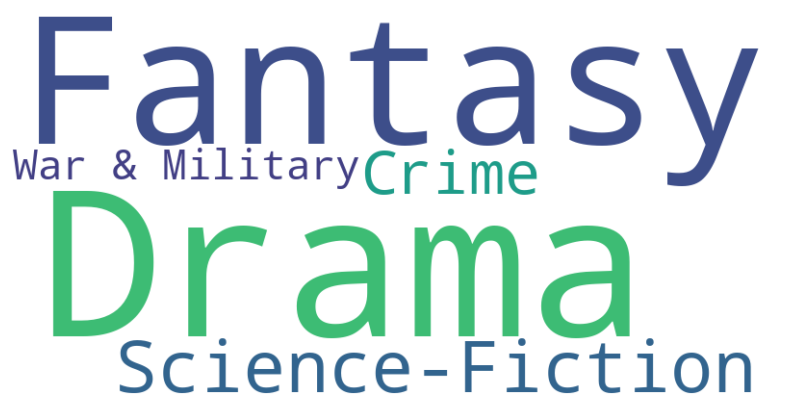

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

print(top_5_tv_show_genres)

#Visvalizing Top 5 TV Shows Genres using word cloud
genre_dict = top_5_tv_show_genres.to_dict()


wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genre_dict)

# Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()




## **Visualizing Top Movie Genres**

Genre
Action & Adventure    13
Drama                 11
Mystery & Thriller     7
Crime                  6
Science-Fiction        6
Name: count, dtype: int64


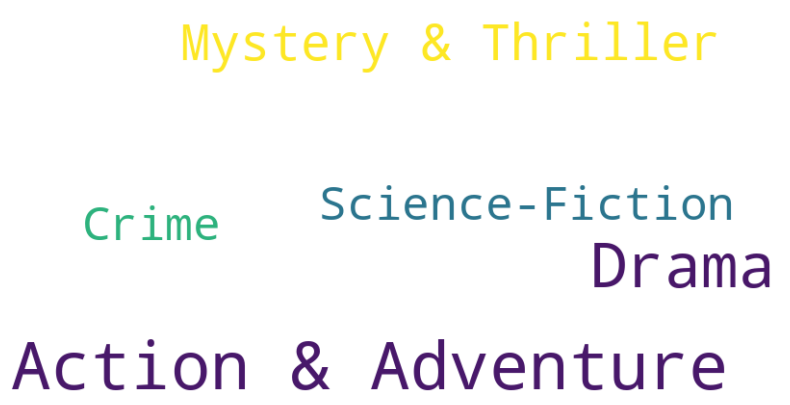

In [ ]:
print(top_5_movie_genres)

#Visvalizing Top 5 Movie Genres using word cloud
genre_dict = top_5_movie_genres.to_dict()


wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genre_dict)

# Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## **Finding Predominant Streaming Service**

Streaming Platform
Amazon Prime Video    7
Netflix               3
Bookmyshow            3
Apple TV              2
Name: count, dtype: int64

The streaming service with the most offerings is: Amazon Prime Video with 7 shows.


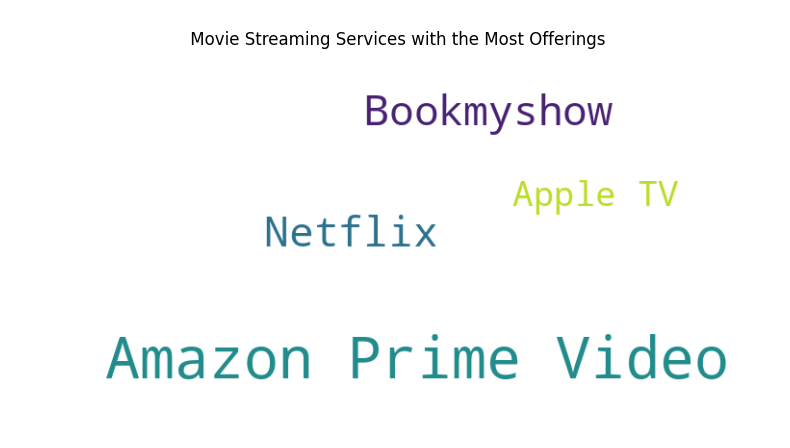

In [ ]:
def calc_streaming_service(df, platform_column):

    # Ruling out the rows where streaming platform column having 'N/A' or NaN values
    filtered_df = df[df[platform_column].notna() & (df[platform_column] != 'N/A')]

    # Counting the total occurrences of each streaming platform
    platform_counts = filtered_df[platform_column].value_counts()


    return platform_counts

#Checking Predominant Streaming Service for Movies
movies_streaming_service = calc_streaming_service(filtered_df_movies, 'Streaming Platform')

print(movies_streaming_service)
print(f"\nThe streaming service with the most offerings is: {movies_streaming_service.idxmax()} with {movies_streaming_service.max()} shows.")

# Visualizing Predominant Streaming Service for Movies
platform_dict = movies_streaming_service.to_dict()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(platform_dict)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('\n Movie Streaming Services with the Most Offerings')
plt.show()


TV Show Streaming Platform
Zee5                  2
Jio Cinema            1
Hotstar               1
Amazon Prime Video    1
Name: count, dtype: int64

The streaming service with the most offerings is: Zee5 with 2 shows.


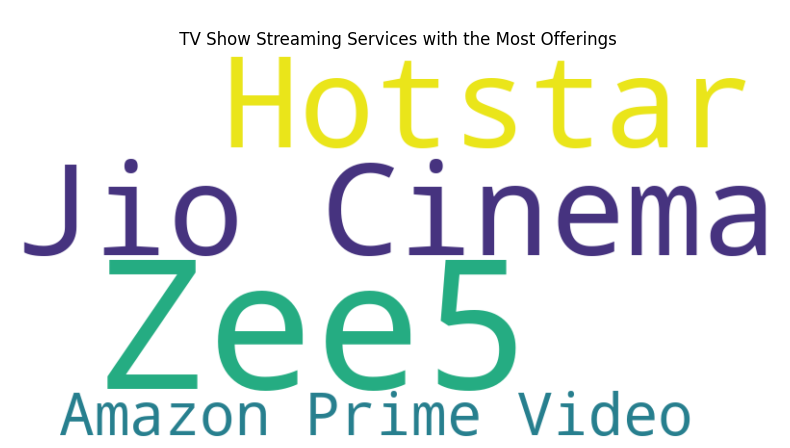

In [ ]:
#Checking Predominant Streaming Service for TV Shows
tvs_streaming_service = calc_streaming_service(filtered_df_tv_shows, 'TV Show Streaming Platform')

print(tvs_streaming_service)
print(f"\nThe streaming service with the most offerings is: {tvs_streaming_service.idxmax()} with {tvs_streaming_service.max()} shows.")

# Visualizing Predominant Streaming Service TV Shows
platform_dict = tvs_streaming_service.to_dict()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(platform_dict)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('\n TV Show Streaming Services with the Most Offerings')
plt.show()

## **Task 3 :- Data Export**

In [ ]:
#saving final dataframe as Final Data in csv format
df_movies.to_csv('Final_Movies_Data.csv', index=False)
df_tv_show.to_csv('Final_Tv_Shows_Data.csv', index=False)


In [ ]:
#saving filter data as Filter Data in csv format
filtered_df_movies.to_csv('Final_Filtered_Movies_Data.csv', index=False)
filtered_df_tv_shows.to_csv('Final_Filtered_Tv_Shows_Data.csv', index=False)

# **Dataset Drive Link (View Access with Anyone) -**